In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from patsy import dmatrix
from sklearn.model_selection import KFold

In [2]:
df = pd.read_csv('~/src/properties_2016.csv')
df.tail()

/Users/quartz/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
2985212,168176230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985213,14273630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985214,168040630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985215,168040830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985216,168040430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
train_2016_df = pd.read_csv('~/src/train_2016.csv')
train_2016_df.tail()

,parcelid,logerror,transactiondate
90270,10774160,-0.0356,2016-12-30
90271,12046695,0.0070,2016-12-30
90272,12995401,-0.2679,2016-12-30
90273,11402105,0.0602,2016-12-30
90274,12566293,0.4207,2016-12-30


In [5]:
submission_df = pd.read_csv('~/src/sample_submission.csv')
submission_df.tail()

,ParcelId,201610,201611,201612,201710,201711,201712
2985212,168176230,0,0,0,0,0,0
2985213,14273630,0,0,0,0,0,0
2985214,168040630,0,0,0,0,0,0
2985215,168040830,0,0,0,0,0,0
2985216,168040430,0,0,0,0,0,0


In [6]:
!ls ~/src/

LICENSE                     sample_submission.csv
README.md                   train_2016.csv
properties_2016.csv         train_2017.csv
properties_2017.csv         zillow_data_dictionary.xlsx


In [11]:
type(train_2016_df['transactiondate'].values[0]

str

In [15]:
len(train_2016_df)

90275

In [19]:
int(train_2016_df['transactiondate'].values[0][-5:-3])


1

In [126]:
jan_df = train_2016_df[:6588]
print(len(jan_df))
jan_df.tail()

6588


,parcelid,logerror,transactiondate
6583,12555190,-0.0050,2016-01-31
6584,17183536,-0.0387,2016-01-31
6585,17170748,0.0431,2016-01-31
6586,14313195,-0.0243,2016-01-31
6587,10886548,-0.0419,2016-01-31


/Users/quartz/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


[]

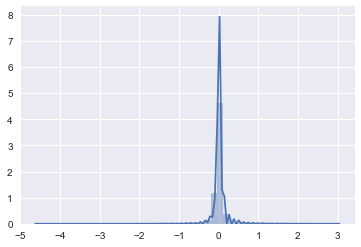

In [35]:
y = jan_df['logerror'].values
sns.distplot(y)
plt.plot()

In [128]:
jan_df['transactiondate'] = "jan"
jan_df.tail()

/Users/quartz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,parcelid,logerror,transactiondate
6583,12555190,-0.0050,jan
6584,17183536,-0.0387,jan
6585,17170748,0.0431,jan
6586,14313195,-0.0243,jan
6587,10886548,-0.0419,jan


In [125]:
feb_df = train_2016_df[6588:12942]
print(len(feb_df))
feb_df.tail()

6354


,parcelid,logerror,transactiondate
12937,13931912,-0.0305,2016-02-29
12938,17217029,-0.0010,2016-02-29
12939,11579407,-0.0151,2016-02-29
12940,11032155,0.0050,2016-02-29
12941,12506392,-0.0040,2016-02-29


/Users/quartz/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


[]

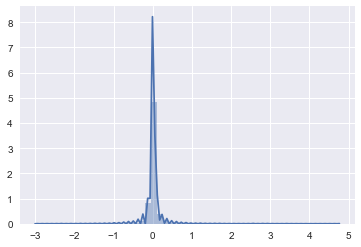

In [47]:
y = feb_df['logerror'].values
sns.distplot(y)
plt.plot()

In [129]:
feb_df['transactiondate'] = "feb"
feb_df.tail()

/Users/quartz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,parcelid,logerror,transactiondate
12937,13931912,-0.0305,feb
12938,17217029,-0.0010,feb
12939,11579407,-0.0151,feb
12940,11032155,0.0050,feb
12941,12506392,-0.0040,feb


In [124]:
mar_df = train_2016_df[12942:21613]
print(len(mar_df))
mar_df.tail()

8671


,parcelid,logerror,transactiondate
21608,14131951,0.0440,2016-03-31
21609,10956632,-0.2269,2016-03-31
21610,10744553,0.0070,2016-03-31
21611,10857345,0.0392,2016-03-31
21612,14141341,-0.0419,2016-03-31


/Users/quartz/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


[]

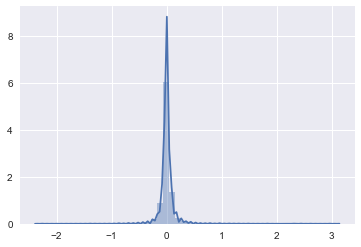

In [59]:
y = mar_df['logerror'].values
sns.distplot(y)
plt.plot()

In [130]:
mar_df['transactiondate'] = "mar"
mar_df.tail()

/Users/quartz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,parcelid,logerror,transactiondate
21608,14131951,0.0440,mar
21609,10956632,-0.2269,mar
21610,10744553,0.0070,mar
21611,10857345,0.0392,mar
21612,14141341,-0.0419,mar


In [123]:
apr_df = train_2016_df[21613:30938]
print(len(apr_df))
apr_df.tail()

9325


,parcelid,logerror,transactiondate
30933,14412490,0.0325,2016-04-30
30934,14713005,0.0305,2016-04-30
30935,17173115,0.1169,2016-04-30
30936,14441650,-0.0243,2016-04-30
30937,17112603,0.0010,2016-04-30


In [131]:
apr_df['transactiondate'] = "apr"
apr_df.tail()

/Users/quartz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,parcelid,logerror,transactiondate
30933,14412490,0.0325,apr
30934,14713005,0.0305,apr
30935,17173115,0.1169,apr
30936,14441650,-0.0243,apr
30937,17112603,0.0010,apr


In [122]:
may_df = train_2016_df[30938:40907]
print(len(may_df))
may_df.tail()
# train_2016_df[40900:41100].head(50)

9969


,parcelid,logerror,transactiondate
40902,14417507,-0.0161,2016-05-31
40903,10799863,0.0149,2016-05-31
40904,14106778,-0.0161,2016-05-31
40905,14747908,0.0050,2016-05-31
40906,14343717,-0.0450,2016-05-31


In [132]:
may_df['transactiondate'] = "may"
may_df.tail()

/Users/quartz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,parcelid,logerror,transactiondate
40902,14417507,-0.0161,may
40903,10799863,0.0149,may
40904,14106778,-0.0161,may
40905,14747908,0.0050,may
40906,14343717,-0.0450,may


In [117]:
june_df = train_2016_df[40907:51823]
print(len(june_df))
june_df.tail()

10916


,parcelid,logerror,transactiondate
51818,14006124,-0.0492,2016-06-30
51819,14608827,-0.0151,2016-06-30
51820,12319588,0.0149,2016-06-30
51821,11268476,0.0159,2016-06-30
51822,12751076,0.1432,2016-06-30


In [133]:
june_df['transactiondate'] = "june"
june_df.tail()

/Users/quartz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,parcelid,logerror,transactiondate
51818,14006124,-0.0492,june
51819,14608827,-0.0151,june
51820,12319588,0.0149,june
51821,11268476,0.0159,june
51822,12751076,0.1432,june


In [119]:
july_df = train_2016_df[51823:61765]
print(len(july_df))
july_df.tail()

9942


,parcelid,logerror,transactiondate
61760,17296293,-0.9339,2016-07-31
61761,14740273,-0.0263,2016-07-31
61762,17105889,0.0149,2016-07-31
61763,11657877,-0.0182,2016-07-31
61764,11691928,-0.0050,2016-07-31


In [134]:
july_df['transactiondate'] = "july"
july_df.tail()

/Users/quartz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,parcelid,logerror,transactiondate
61760,17296293,-0.9339,july
61761,14740273,-0.0263,july
61762,17105889,0.0149,july
61763,11657877,-0.0182,july
61764,11691928,-0.0050,july


In [118]:
aug_df = train_2016_df[61765:72210]
print(len(aug_df))
aug_df.tail()

10445


,parcelid,logerror,transactiondate
72205,10790933,-0.1043,2016-08-31
72206,11184038,0.0198,2016-08-31
72207,12744934,-0.0243,2016-08-31
72208,14610573,0.0334,2016-08-31
72209,12179869,0.0488,2016-08-31


In [135]:
aug_df['transactiondate'] = "aug"
aug_df.tail()

/Users/quartz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,parcelid,logerror,transactiondate
72205,10790933,-0.1043,aug
72206,11184038,0.0198,aug
72207,12744934,-0.0243,aug
72208,14610573,0.0334,aug
72209,12179869,0.0488,aug


In [120]:
sep_df = train_2016_df[72210:81760]
print(len(sep_df))
sep_df.tail()

9550


,parcelid,logerror,transactiondate
81755,10787425,0.0000,2016-09-30
81756,13998517,0.0080,2016-09-30
81757,11879234,0.0315,2016-09-30
81758,11081906,-0.0101,2016-09-30
81759,17181993,-0.1020,2016-09-30


In [136]:
sep_df['transactiondate'] = "sep"
sep_df.tail()

/Users/quartz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,parcelid,logerror,transactiondate
81755,10787425,0.0000,sep
81756,13998517,0.0080,sep
81757,11879234,0.0315,sep
81758,11081906,-0.0101,sep
81759,17181993,-0.1020,sep


In [121]:
oct_df = train_2016_df[81760:86725]
print(len(oct_df))
oct_df.tail()

4965


,parcelid,logerror,transactiondate
86720,14373930,0.0139,2016-10-31
86721,11771948,0.1035,2016-10-31
86722,14662972,-0.1087,2016-10-31
86723,11284058,0.1398,2016-10-31
86724,12146205,0.0450,2016-10-31


In [137]:
oct_df['transactiondate'] = "oct"
oct_df.tail()

/Users/quartz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,parcelid,logerror,transactiondate
86720,14373930,0.0139,oct
86721,11771948,0.1035,oct
86722,14662972,-0.1087,oct
86723,11284058,0.1398,oct
86724,12146205,0.0450,oct


In [115]:
nov_df = train_2016_df[86725:88548]
print(len(nov_df))
nov_df.tail()

1823


,parcelid,logerror,transactiondate
88543,12172677,0.0507,2016-11-30
88544,11724751,0.2814,2016-11-30
88545,12788984,0.0020,2016-11-30
88546,17147400,0.0742,2016-11-30
88547,13020802,0.0334,2016-11-30


In [138]:
nov_df['transactiondate'] = "nov"
nov_df.tail()

/Users/quartz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,parcelid,logerror,transactiondate
88543,12172677,0.0507,nov
88544,11724751,0.2814,nov
88545,12788984,0.0020,nov
88546,17147400,0.0742,nov
88547,13020802,0.0334,nov


In [116]:
dec_df = train_2016_df[88548:90274]
print(len(dec_df))
dec_df.tail()

1726


,parcelid,logerror,transactiondate
90269,12920746,0.0344,2016-12-30
90270,10774160,-0.0356,2016-12-30
90271,12046695,0.0070,2016-12-30
90272,12995401,-0.2679,2016-12-30
90273,11402105,0.0602,2016-12-30


In [139]:
dec_df['transactiondate'] = "dec"
dec_df.tail()

/Users/quartz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,parcelid,logerror,transactiondate
90269,12920746,0.0344,dec
90270,10774160,-0.0356,dec
90271,12046695,0.0070,dec
90272,12995401,-0.2679,dec
90273,11402105,0.0602,dec


In [149]:
df[df['parcelid'] == 10754147]

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN


In [148]:
train_2016_df[train_2016_df['parcelid'] == 10754147]

,parcelid,logerror,transactiondate


In [ ]:
df3 = pd.concat([df1, df2], ignore_index = True)
df3

In [142]:
month_df['transactiondate'].value_counts()

june    10916
aug     10445
may      9969
july     9942
sep      9550
apr      9325
mar      8671
jan      6588
feb      6354
oct      4965
nov      1823
dec      1726
Name: transactiondate, dtype: int64

In [140]:
month = [jan_df, feb_df, mar_df, apr_df, may_df, june_df, july_df, aug_df, sep_df, \
         oct_df, nov_df, dec_df]

month_df = pd.concat(month, ignore_index=True)
month_df

,parcelid,logerror,transactiondate
0,11016594,0.0276,jan
1,14366692,-0.1684,jan
2,12098116,-0.0040,jan
3,12643413,0.0218,jan
4,14432541,-0.0050,jan
5,11509835,-0.2705,jan
6,12286022,0.0440,jan
7,17177301,0.1638,jan
8,14739064,-0.0030,jan
9,14677559,0.0843,jan


In [146]:
formula = 'logerror ~ C(transactiondate)'

model = sm.OLS.from_formula(formula, data=month_df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               logerror   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.762
Date:                Thu, 05 Jul 2018   Prob (F-statistic):           2.34e-07
Time:                        16:29:02   Log-Likelihood:                 36764.
No. Observations:               90274   AIC:                        -7.350e+04
Df Residuals:                   90262   BIC:                        -7.339e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [147]:
month_df['transactiondate'].value_counts()

june    10916
aug     10445
may      9969
july     9942
sep      9550
apr      9325
mar      8671
jan      6588
feb      6354
oct      4965
nov      1823
dec      1726
Name: transactiondate, dtype: int64

In [167]:
month = [jan_df, feb_df, mar_df, apr_df, may_df, june_df, july_df, aug_df, sep_df, \
         oct_df, nov_df, dec_df]
logerror_month = []
for mon in month:
    logerror_month.append(np.mean(mon['logerror'].values))

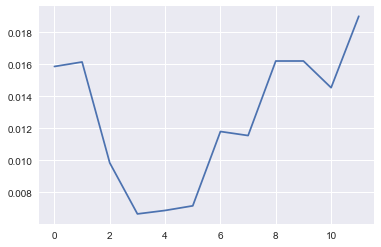

In [168]:
plt.plot(logerror_month)
plt.show()

In [158]:


jan_df['logerror'].values

array([ 0.0276, -0.1684, -0.004 , ...,  0.0431, -0.0243, -0.0419])

In [151]:
arparams = np.array([.75, -.25])
maparams = np.array([.65, .35])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams]  # add zero-lag
m = sm.tsa.ArmaProcess(ar, ma)
print(m)

ArmaProcess
AR: [1.0, -0.75, 0.25]
MA: [1.0, 0.65, 0.35]


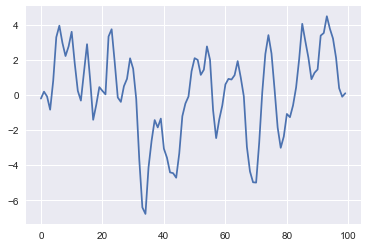

In [152]:
np.random.seed(12345)
x = m.generate_sample(100)
plt.plot(x)
plt.show()

In [153]:
m2 = sm.tsa.ARMA(x, (2, 2))
print(type(m2))
r = m2.fit(disp=False)
print(type(r))
print(r.summary())

<class 'statsmodels.tsa.arima_model.ARMA'>
<class 'statsmodels.tsa.arima_model.ARMAResultsWrapper'>
                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  100
Model:                     ARMA(2, 2)   Log Likelihood                -144.231
Method:                       css-mle   S.D. of innovations              1.011
Date:                Thu, 05 Jul 2018   AIC                            300.462
Time:                        16:58:31   BIC                            316.093
Sample:                             0   HQIC                           306.788
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1152      0.533      0.216      0.829      -0.929       1.159
ar.L1.y        0.6593      0.17